# AST326 lab01
### Maxwell Fine 1004714400

Ex02: Read the two files in your Python code and calculate the mean and standard deviation
of the measurements recorded in each file (so you will have values for “Small” and “Large”
files respectively). Are they consistent with what you expect from a Poisson distribution? The difference between “Small” and “Large” is the integration time wherein the latter has a much longer integration time than the former, so larger count rates in “Large” files than “Small.”

Ex03: Plot the measurements to examine their distributions. First, you can simply plot the
measurements in sequence and then using a histogram (like Figure 1 above). These analyses
and plots need to be done separately for “Small” and “Large” measurements. By glancing the
plots, can you roughly estimate the mean and standard deviation of the two measurements?
Compare the histogram that you created for the “Small” data with what is expected from a
Poisson distribution as Figure 3 above.

In [100]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
from scipy.stats import poisson as sp_poisson

# data fname's
large_f = 'data/Fine-finemaxw-Large.txt'
small_f = 'data/Fine-finemaxw-Small.txt'

In [38]:
# load data

large_data = np.genfromtxt(fname=large_f, dtype=int)
small_data = np.genfromtxt(fname=small_f, dtype=int)

## Ex02

In [39]:
# determination if poisson distribution
# recall for Poisson distributions that std**2 = mean, in real data this is only aproxametly true

def is_poisson_mean(arr, tolerance=0.05):
    # what to use for a 'good' tolerance? 
    # less then 5% error?
    
    mean = np.mean(arr)
    std = np.std(arr)
    
    poisson_test = (mean-std**2) / mean
    
    return poisson_test
    
def is_poisson_std(arr, tolerance=0.05):
    # what to use for a 'good' tolerance? 
    # less then 5% error?
    
    mean = np.mean(arr)
    std = np.std(arr)
    
    poisson_test = (np.sqrt(mean)-std) / std
    
    return poisson_test

In [40]:
is_poisson_mean(large_data, tolerance=0.05)

-0.00702995003928223

In [41]:
is_poisson_std(small_data, tolerance=0.001)  *100

-0.7668334925077578

In [42]:
is_poisson_mean(small_data, tolerance=0.001) *100

-1.551490107688457

### depends on how we measure

what is a good value? how do we justify this? 

In [43]:
(31/1000) *100 #its less then sqrt(n) error is that resonable? 

3.1

## Ex03

In [164]:
def poisson_pmf(mean, k_array):
    '''returns a Poisson positon mass function for
       the specified mean, and computed over the k_array'''
    
    k= k_array
    mu = mean
    pmf = (mu**k * (np.e**-mu))/ factorial(k)
    
    return pmf


def plot_hist_scatter(data, title1='title', title2='title',
                      save_name1='name.pdf', save_name2='name.pdf'):
    
    mean = np.mean(data)
    std = np.sqrt(mean)
    
    # generate Poisson with same mean
    k_arr = np.linspace(0, np.max(data),5*np.max(data))
    poisson_arr = poisson_pmf(mean, k_arr)
 
    # generate Gaussian with same mean, and std
    
    
    plt.hist(data, bins=int(np.sqrt(len(data))), color='g', label='Data')
    plt.xlabel('Photon Counts', fontsize=15)
    plt.ylabel('Number of Measurments',fontsize=15)
    plt.title(title1, fontsize=15)
    
    # plot distrubutions
    plt.plot(k_arr, len(data)*poisson_arr, color = 'k',
             linestyle='--', label='Poisson Distribution')
    plt.legend(fontsize=12)
    
    # smart y lims
    
    if mean-4*std> 0:
        xmin = mean-4*std
    else:
        xmin = 0
    
    xmax = mean+4*std
    plt.xlim(xmin, xmax)
    plt.show()
    plt.savefig('figs/' + save_name1 + '_hist.pdf')
    
    # fig 2
    plt.scatter(np.arange(0, len(data)), data, color='black') 
    plt.xlabel('Measurments', fontsize=15)
    plt.ylabel('Photon Counts', fontsize=15)
    plt.savefig('figs/' + save_name2 + '_hist.pdf')
    
    

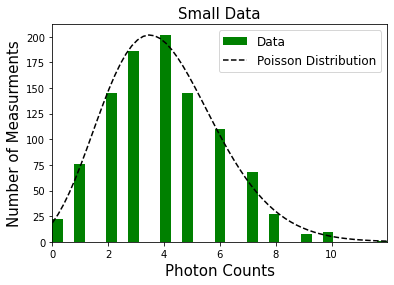

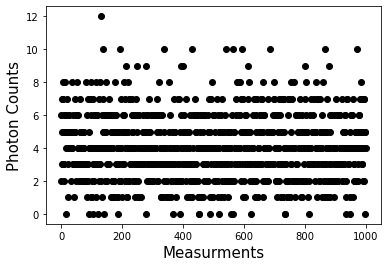

In [165]:
plot_hist_scatter(small_data, title1='Small Data', title2='Small Data',
                      save_name1='small.pdf', save_name2='small.pdf')

/tmp/ipykernel_4097/2397210892.py:7: RuntimeWarning: overflow encountered in power
  pmf = (mu**k * (np.e**-mu))/ factorial(k)
/tmp/ipykernel_4097/2397210892.py:7: RuntimeWarning: invalid value encountered in multiply
  pmf = (mu**k * (np.e**-mu))/ factorial(k)


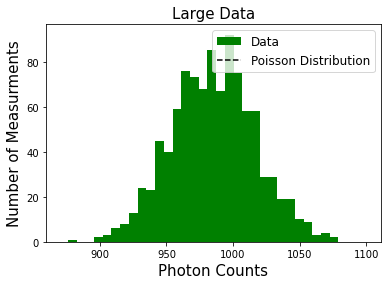

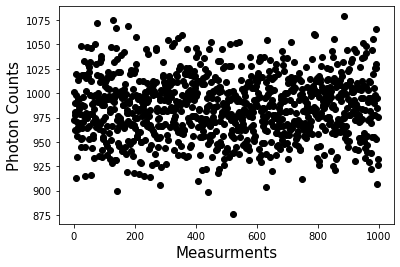

In [163]:
plot_hist_scatter(large_data, title1='Large Data', title2='Large Data',
                      save_name1='large.pdf', save_name2='large.pdf')

In [113]:
len(large_data)

1000